In [14]:
import torch
import numpy as np

# Tensor Creation Operation

### Table of Contents

1. [torch.tensor](#torch.tensor)
2. [torch.as_tensor](#torch.as_tensor)
3. [torch.from_numpy](#torch.from_numpy)
4. [torch.asarray](#torch.asarray)
5. [torch.as_strided](#torch.as_strided)
6. [torch.frombuffer](#torch.frombuffer)
7. [torch.zeros](#torch.zeros)
8. [torch.zeros_like](#torch.zeros_like)
9. [torch.ones](#torch.ones)
10. [torch.ones_like](#torch.ones_like)
11. [torch.arange](#torch.arange)
12. [torch.linspace](#torch.linspace)
13. [torch.logspace](#torch.logspace)
14. [torch.eye](#torch.eye)
15. [torch.empty](#torch.empty)
16. [torch.empty_strided](#torch.empty_strided)
17. [torch.full](#torch.full)
18. [torch.quantize_per_tensor](#torch.quantize_per_tensor)
19. [torch.quantize_per_channel](#torch.quantize_per_channel)
20. [torch.dequantize](#torch.dequantize)
21. [torch.polar](#torch.polar)

<a id="torch.tensor"></a>
### 1. torch.tensor

`torch.tensor(data, *, dtype=None, device=None, require_grad=False, pin_memory=False) -> Tensor`

Constructs a tensor with no autograd history (also knows as "leaf tensor") by copying `data`. 

In [11]:
torch.tensor([[0.1, 1.2], [2.2, 3.1], [4.9, 5.2]])

tensor([[0.1000, 1.2000],
        [2.2000, 3.1000],
        [4.9000, 5.2000]])

In [12]:
torch.tensor([[0.1111, 0.2222, 0.33333]], dtype=torch.float64, device=torch.device('cuda:0'))

tensor([[0.1111, 0.2222, 0.3333]], device='cuda:0', dtype=torch.float64)

In [13]:
torch.tensor(3.1313)

tensor(3.1313)

<mark>*Warning:*</mark>

`torch.tensor(data)`, here `data` is considered to be a python list or a numpy array. When working with tensors prefer using `torch.Tensore.clone()`, `torch.Tensor.detach()`, and `torch.Tensor.require_grad_()` for **readability**.

Note that letting *t* be a tensor, `torch.tensor(t)` is equivalent to `t.clone().detach()`, and `torch.tensor(t, requires_grad=True)` is equivalent to `t.clone().detach().require_grad_(True)`.

<a id="torch.as_tensor"></a>
### 2. torch.as_tensor

`torch.as_tensor(data, dtype=None, device=None) -> Tensor`

Converts `data` into a tensor, sharing data and preserving autograd history if possible.

If `data` is already a tensor with the requested dtype and device then `data` itself is returned, but if `data` is a tensor with a different dtype or device then it's copies as if using `data.to(dtype=dtype, device=device)`

If `data` is a Numpy array with same dtype and device then a tensor is constructed using `torch.from_numpy()`.

In [15]:
a = np.array([1, 2, 3])
t = torch.as_tensor(a)
t

tensor([1, 2, 3])

In [16]:
t[0] = -1
a

array([-1,  2,  3])

As can be seen, both the newly created tensor `t` and numpy array `a` both share the same address in memory. However, if we move the tensor to some other device then they become independent.

In [17]:
a = np.array([1, 2, 3])
t = torch.as_tensor(a, device=torch.device('cuda'))
t

tensor([1, 2, 3], device='cuda:0')

In [18]:
t[0] = -1
a

array([1, 2, 3])

<a id="torch.from_numpy"></a>
### 3. torch.from_numpy

Create a Tensor from numpy-ndarray. The returned tensor and ndarray share the same memory, modification to the tensor will be relfected in the ndarray and vice vera. The returned tensor is **not resizable**.

In [19]:
a = np.array([1, 2, 3])
t = torch.from_numpy(a)
t

tensor([1, 2, 3])

In [20]:
t[0] = -1
a

array([-1,  2,  3])

<a id="torch.asarray"></a>
### 4. torch.asarray

`torch.asarray(obj, *, dtype=None, device-None, copy=None, require_grad=False) -> Tensor`

Converts `obj` to a tensor. `obj` can be one of: 

* a tensor
* a NumPy array or a NumPy scalar
* a DLPack capsule
* an object that implements Python’s buffer protocol
* a scalar
* a sequence of scalars

When `obj` is a tensor, NumPy array, or DLPack capsule the returned tensor will, by default, not require a gradient, have the same datatype as `obj`, be on the same device, and share memory with it. These properties can be controlled with the `dtype`, `device`, `copy`, and `requires_grad` keyword arguments.

If the returned tensor is of a different datatype, on a different device, or a copy is requested then it will not share its memory with `obj`. If `require_grad` is `True` then the returned tensor will require a gradient, and if `obj` is also a tensor with an autograd history then the returned tensor will have the same history.

When obj is not a tensor, NumPy array, or DLPack capsule but implements Python’s buffer protocol then the buffer is interpreted as an array of bytes grouped according to the size of the datatype passed to the dtype keyword argument. 

In [21]:
a = torch.tensor([1,2,3])
b = torch.asarray(a)
a.data_ptr() == b.data_ptr()

True

In [22]:
# Force memory copy
c = torch.asarray(a, copy=True)
a.data_ptr() == c.data_ptr()

False

In [23]:
a = torch.tensor([1., 2., 3.], requires_grad=True)
b = a + 2
b

tensor([3., 4., 5.], grad_fn=<AddBackward0>)

<a id="torch.as_strided"></a>
### 5. torch.as_strided

`torch.as_strided(input, size, stride, storage_offset=None) -> Tensor`

Create a view of an exsisting torch.Tensor `input` with speicified `size`, `stride` and `storage_offset`.

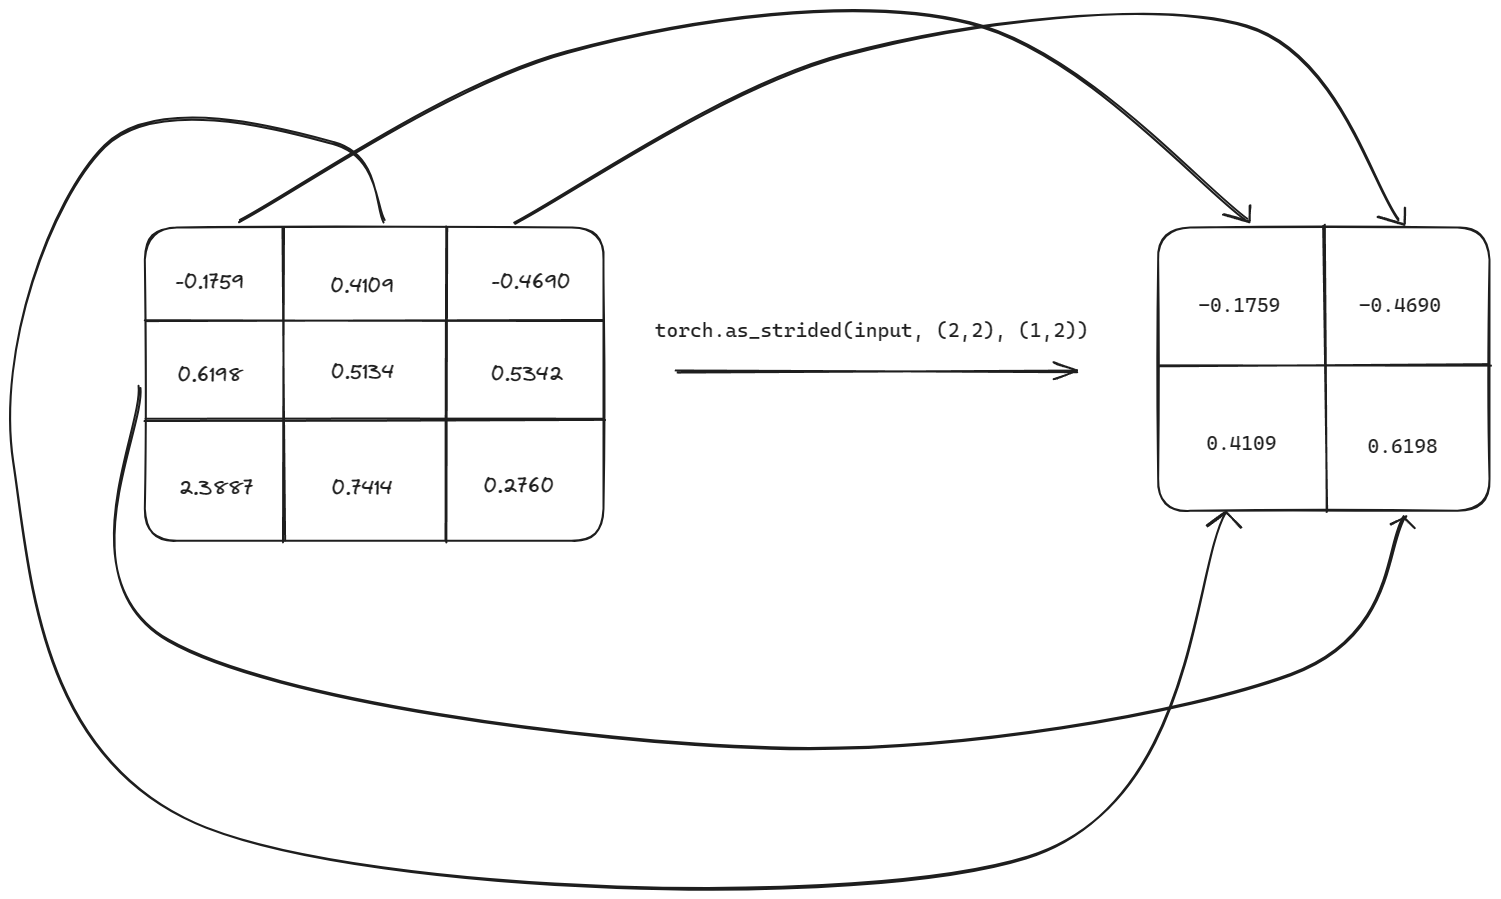

In [24]:
x = torch.randn(3,3)
x

tensor([[-0.1759,  0.4109, -0.4690],
        [ 0.6198,  0.5134,  0.5342],
        [ 2.3887,  0.7414,  0.2760]])

In [25]:
t = torch.as_strided(x, (2,2), (1,2))
t

tensor([[-0.1759, -0.4690],
        [ 0.4109,  0.6198]])

In [26]:
t = torch.as_strided(x, (2,2), (1,2), 1)
t

tensor([[ 0.4109,  0.6198],
        [-0.4690,  0.5134]])

<a id="torch.frombuffer"></a>
### 6. torch.frombuffer

`torch.frombuffer(buffer, *, dtype, count=1, offset=0, requires_grad=False) -> Tensor`

Create a 1-dimensional `Tensor` from an object that implements the Python buffer protocol.

Skips the first `offset` bytes in the buffer, and interprets the rest of the raw bytes as a 1-dimensional tensor of type `dtype` with `count` elements.

One of these two conditions must be met:
1. `count` is a positive non-zero number, and the total number of bytes in the buffer is less than `offset` plus `count` times the size (in bytes) of dtype.
$$
\text{total number of bytes} \le \text{(offset + count) * size(dtype)} \ \textbf{where} \ count > 0 \ \text{and size(dtype) is 8,16,32,64} 
$$
2. `count` is negative, and the length (number of bytes) of the buffer subtracted by `offset` is a multiple of the size (in bytes) of `dtype`.
$$
(\text{total number of bytes} - \text{offset}) \ \% \ \text{size(dtype)} = 0 \ \textbf{where} \ count < 0 \ \text{and size(dtype) is 8,16,32,64}
$$

The returned tensor and buffer share the same memory. Modification to the tensor will be reflected in the buffer and vice versa. The returned tensor is not resizable.

In [27]:
import array
a = array.array('i', [1,2,3])
t = torch.frombuffer(a, dtype=torch.int32)
t

tensor([1, 2, 3], dtype=torch.int32)

In [32]:
# Interpets the signed char bytes as 32-bit integers.
# Each 4 signed char elements will be interprted as 1 signed 32-bit integer

a = array.array('b', [-1, 0, 0, 0])
torch.frombuffer(a, dtype=torch.int32)

tensor([255], dtype=torch.int32)

<a id="torch.zeros"></a>
### 7. torch.zeros

`torch.zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor`

Returns a tensor filled with scalar value 0, with the shape deficed by the variable argument `size`


In [33]:
torch.zeros(2,3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [35]:
torch.zeros(5)

tensor([0., 0., 0., 0., 0.])

<a id="torch.zeros_like"></a>
### 8. torch.zeros_like

`torch.zero_like(input, *, dtype=None, layout=None, device=None, requires_grad=False, memory_format=torch.preserve_format) -> Tensor`

Returns a tensor filled with scalar value 0, with the same size as `input`. `torch.zeros_like(input)` is equivalent to `torch.zeros(input.size(), dtpye=input.dtype, layout=input.layour, device=input.device)`. 

In [36]:
input = torch.empty(2,3)
torch.zeros_like(input)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

<a id="torch.ones"></a>
### 9. torch.ones

`torch.ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor`

Returns a tensor filled with scalar value 1, with the shape deficed by the variable argument `size`.

In [37]:
torch.ones(2,3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [38]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

<a id="torch.ones_like"></a>
### 10. torch.ones_like 

same as zero_like, but with ones.

In [39]:
input = torch.empty(2,3)
torch.ones_like(input)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

<a id="torch.arange"></a>
### 11. torch.arange

`torch.arange(start=0, end, step=1, *, out=None, dtype=None, layout=torch.strided, device=None, require_grad=False) -> Tensor`

Returns a 1-D tensor of size $$\lceil\frac{end-start}{step}\rceil$$ with values from interval `[start, end)` taken with common difference `step` beginning from start.

Note than non-integer `step` is subject to floating point rounding error when comparing against `end`; to avoid inconsistency, its advisable to subtract a small epsilon from `end` in such cases. $$out_{i+1} = out_i + step$$

In [40]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [41]:
torch.arange(1,4)

tensor([1, 2, 3])

In [42]:
torch.arange(1, 2.5, 0.5)

tensor([1.0000, 1.5000, 2.0000])

<a id="torch.linspace"></a>
### 12. torch.linspace

`torch.linspace(start, end, steps, *, out=None, dtype=None, layout=torch.strided, device=None. requires_grad=False) -> Tensor`

Creates a one-dimensional tensor of size `steps` whose values are evenly spaces from `start` to `end`, inclusive

In [44]:
torch.linspace(3, 10, steps=5)

tensor([ 3.0000,  4.7500,  6.5000,  8.2500, 10.0000])

In [45]:
torch.linspace(-10, 10, steps=5)

tensor([-10.,  -5.,   0.,   5.,  10.])

In [47]:
torch.linspace(start=-10, end=10, steps=5)

tensor([-10.,  -5.,   0.,   5.,  10.])

In [46]:
torch.linspace(start=-10, end=10, steps=1)

tensor([-10.])

<a id="torch.logspace"></a>
### 13. torch.logspace

`torch.logspace(start, end, steps, base=10.0, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor`

Create a one-dimensional tensor of size `steps` whose values are evenly spaced from $base^{start}$ to $base^{end}$, inclusive, on a logarithmic scale with base `base`.

$$
(base^{start}, base^{start+\frac{end-start}{steps-1}}, ... , base^{start+(steps-2)\frac{end-start}{steps-1}}, base^{end})
$$

In [48]:
torch.logspace(start=-10, end=10, steps=5)

tensor([1.0000e-10, 1.0000e-05, 1.0000e+00, 1.0000e+05, 1.0000e+10])

In [49]:
torch.logspace(start=0.1, end=1.0, steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

<a id="torch.eye"></a>
### 14. torch.eye

`torch.eye(n, m=None, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)`

Returns a 2-D tensor with ones on the diagonal and zeros elsewhere.

`n` is the number of rows and `m` is the number of columns with default being `n`

In [50]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

<a id="torch.empty"></a>
### 15. torch.empty

`torch.empty(*size, *, out=None. dtype=None, layout=torch.strided, device=None, requires_grad=False, pin_memory=False, memory_format=torch.contiguous_format) -> Tensor`

Returns a tensor filled with unintialized data. The shape of the tensor is defined by variable argument `size`.

`size (int..)` is a sequence of integers defining the shape of the output tensor. Can be a variable number of arguments or a collection like a list or tuple.

In [51]:
torch.empty((2,3),  dtype=torch.int64)

tensor([[100869428,         0,         0],
        [        0,         1,         0]])

In [52]:
torch.empty([2,3],  dtype=torch.int64)

tensor([[191016388,         0,         1],
        [        0,        80,        96]])

In [53]:
torch.empty(5,  dtype=torch.int64)

tensor([140713023863984,       190305680,              32,              64,
              190265521])

<a id="torch.empty_like"></a>
### 15. torch.empty_like

Returns an unintialized tensor with the same size as `input`. `torch.empty_like(input)` is equivalent to `torch.empty(input.size(), dtype=input.dtype, layout=input.layout, device=input.device)`.

In [54]:
a = torch.empty((2,3), dtype=torch.int32, device = 'cuda')
torch.empty_like(a)

tensor([[-1298798110,  1069314316,           0],
        [          0,           0,           0]], device='cuda:0',
       dtype=torch.int32)

<a id="torch.empty_strided"></a>
### 16. torch.empty_strided

`torch.empty_strided(size, stride, *, dtype=None, layout=None, device=None, requires_grad=False, pin_memory=False) → Tensor`

Create a tensor with specified `size` and `stide` and filled with undefiend data.

In [56]:
a = torch.empty_strided((2,3), (1,2))
a

tensor([[4.3094e+08, 4.3094e+08, 7.1760e+22],
        [4.5909e-41, 4.5909e-41, 7.2250e+28]])

In [57]:
a.stride()

(1, 2)

In [58]:
a.size()

torch.Size([2, 3])

<a id="torch.full"></a>
### 17. torch.full

`torch.full(size, fill_value, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor`

Creates a tensor of size `size` filles with `fill_value`. The tensor's dtype is inferrend from `fill_value` 

In [59]:
torch.full((2,3), 3.141592)

tensor([[3.1416, 3.1416, 3.1416],
        [3.1416, 3.1416, 3.1416]])

<a id="torch.full_like"></a>
### 18. torch.full_like

`torch.full_like(input, fill_value, \*, dtype=None, layout=torch.strided, device=None, requires_grad=False, memory_format=torch.preserve_format) → Tensor`

Returns a tensor with same size as `input` filled with `fill_value`. `torch.full_like(input, fill_value)` is equivalent to `torch.full(input.size(), fill_value, dtype+input.dtype, layout=input.layout, device=input.device)`.


In [60]:
a = torch.ones((2,3), device='cuda')
torch.full_like(a, 2)

tensor([[2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

<a id="torch.quantize_per_tensor"></a>
### 18. torch.quantize_per_tensor

`torch.quantize_per_tensor(input, scale, zero_point, dtype) -> Tensor`

Converts a float tensor to a quantized tensor with given scale and zero point.
* input (Tensor) – float tensor or list of tensors to quantize
* scale (float or Tensor) – scale to apply in quantization formula
* zero_point (int or Tensor) – offset in integer value that maps to float zero
* dtype (torch.dtype) – the desired data type of returned tensor. Has to be one of the quantized dtypes: torch.quint8, torch.qint8, torch.qint32

In [62]:
torch.quantize_per_tensor(torch.tensor([-1.031, 0.0532, 1.123, 2.0]), 0.1, 10, torch.quint8)

tensor([-1.0000,  0.1000,  1.1000,  2.0000], size=(4,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.1, zero_point=10)

In [63]:
torch.quantize_per_tensor(torch.tensor([-10, 0.0, 1.0, 2.0]), 0.1, 10, torch.quint8).int_repr()

tensor([ 0, 10, 20, 30], dtype=torch.uint8)

In [64]:
torch.quantize_per_tensor([torch.tensor([-1.0, 0.0]), torch.tensor([-2.0, 2.0])], 
                         torch.tensor([0.1, 0.2]), torch.tensor([10,20]), torch.quint8)

(tensor([-1.,  0.], size=(2,), dtype=torch.quint8,
        quantization_scheme=torch.per_tensor_affine, scale=0.10000000149011612,
        zero_point=10),
 tensor([-2.,  2.], size=(2,), dtype=torch.quint8,
        quantization_scheme=torch.per_tensor_affine, scale=0.20000000298023224,
        zero_point=20))

In [65]:
torch.quantize_per_tensor(torch.tensor([-1.0, 0.0, 1.0, 2.0]),
                         torch.tensor(0.1), torch.tensor(10), torch.quint8)

tensor([-1.,  0.,  1.,  2.], size=(4,), dtype=torch.quint8,
       quantization_scheme=torch.per_tensor_affine, scale=0.10000000149011612,
       zero_point=10)

<a id="torch.quantize_per_channel"></a>
### 19. torch.quantize_per_channel

`torch.quantize_per_channel(input, scales, zero_points, axis, dtype) → Tensor`

Converts a float tensor to per-channel quantized tensor with given scale and zero points.

In [67]:
x = torch.tensor([[-1.0, 0.0], [1.0, 2.0]])
torch.quantize_per_channel(x, torch.tensor([0.1, 0.01]),
                          torch.tensor([10, 0]), 0, torch.quint8).int_repr()

tensor([[  0,  10],
        [100, 200]], dtype=torch.uint8)

<a id="torch.dequantize"></a>
### 20. torch.dequantize

`torch.dequantize(tensor) -> Tensor`

Returns a fp32 Tensor by dequantizing a qunatized Tensor. It can also take a list of quantized tensors.

In [68]:
torch.quantize_per_tensor(torch.tensor([-1.031, 0.0532, 1.123, 2.0]), 0.1, 10, torch.quint8)
torch.dequantize(x)

tensor([[-1.,  0.],
        [ 1.,  2.]])

<a id="torch.polar"></a>
### 21. torch.polar

`torch.polar(abs, angle, *, out=None) -> Tensor`

Constructs a complex tensor whose elements are Cartesian coordinates correpondings to the polar coordinated with absolute value `abs` and angle `angle`

$$
out = abs \cdot \cos{(angle)} + abs \cdot \sin{(angle)} \cdot j
$$

* abs (Tensor) - The absolute value the complex tensor. Must be float or double.
* angle (Tensor) - The angle of the complex tensor. Must be same dtype as `abs`

In [69]:
import numpy as np
abs = torch.tensor([1,2], dtype=torch.float64)
angle = torch.tensor([np.pi / 2, 5 * np.pi / 4], dtype=torch.float64)
abs, angle

(tensor([1., 2.], dtype=torch.float64),
 tensor([1.5708, 3.9270], dtype=torch.float64))

In [70]:
z = torch.polar(abs, angle)
z

tensor([ 6.1232e-17+1.0000j, -1.4142e+00-1.4142j], dtype=torch.complex128)

<a id="torch.heaviside"></a>
### 21. torch.heaviside

`torch.heaviside(input, values, *, out=None) -> Tensor`

Computes the Heaviside step function for each element in `input`. The Heaviside step function is defined as:

$$
heaviside(input,values) = 
\begin{cases} 
  0, & \text{if } input < 0, \\
  values, & \text{if } input == 0, \\
  1, & \text{if } input \geq 0,
\end{cases}
$$

* input (Tensor) - the input tensor
* values (Tensor) - The values to use where `input` is zero

In [71]:
input = torch.tensor([-1.5, 0, 2.0])
values = torch.tensor([0.5])
torch.heaviside(input, values)

tensor([0.0000, 0.5000, 1.0000])

In [72]:
values = torch.tensor([1.2, -2.0, 3.5])
torch.heaviside(input, values)

tensor([ 0., -2.,  1.])